In [19]:
import nibabel as nib
import numpy as np
import json
import os
import os.path
import matplotlib.pyplot as plt
import pandas as pd
from src.utils.data import getDataPandas

In [20]:
data = getDataPandas()
data = data.sample(frac=1, random_state=1).reset_index(drop=True)

In [21]:
dup = np.sum(data.duplicated(subset=['PATNO']))
print('患者出现不止一次: {}'.format(dup))

患者出现不止一次: 202


In [22]:
data_pvi = data
data_pv = data.drop_duplicates(subset=['PATNO', 'EVENT_ID'], keep='first').reset_index(drop=True)
data_p = data.drop_duplicates(subset=['PATNO'], keep='first').reset_index(drop=True)

In [23]:
print(len(data[data_pvi['SEX']==1]))
print(len(data[data_pvi['SEX']==0]))
print(len(data[data_pvi['CAT']==1]))
print(len(data[data_pvi['CAT']==0]))
data_pvi.describe()

233
130
190
173


,PATNO,NUPDR3OF,NUPDR3ON,AGE_AT_VISIT,SEX,SCORE,DURATION,CAT
count,363.000000,363.000000,363.00000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,28557.184573,28.363636,19.07438,64.442424,0.641873,0.327477,46.732782,0.523416
std,28588.427233,12.299665,11.24501,9.103962,0.480111,0.244642,21.599511,0.500141
min,3107.000000,2.000000,1.00000,35.100000,0.000000,-0.272727,2.000000,0.000000
25%,3558.000000,19.000000,11.00000,58.400000,0.000000,0.156725,30.000000,0.000000
50%,4083.000000,27.000000,18.00000,65.500000,1.000000,0.312500,51.000000,1.000000
75%,50173.500000,36.000000,25.00000,71.300000,1.000000,0.492424,57.000000,1.000000
max,149511.000000,62.000000,64.00000,86.300000,1.000000,0.956522,112.000000,1.000000


In [24]:
print(len(data_pv[data_pv['SEX']==1]))
print(len(data_pv[data_pv['SEX']==0]))
print(len(data_pv[data_pv['CAT']==1]))
print(len(data_pv[data_pv['CAT']==0]))
data_pv.describe()

157
81
118
120


,PATNO,NUPDR3OF,NUPDR3ON,AGE_AT_VISIT,SEX,SCORE,DURATION,CAT
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,28304.176471,27.134454,18.592437,63.679832,0.659664,0.310289,42.159664,0.495798
std,30601.500171,12.409962,11.014656,9.211478,0.474821,0.247438,22.511125,0.501036
min,3107.000000,2.000000,1.000000,35.100000,0.000000,-0.272727,2.000000,0.000000
25%,3425.250000,17.250000,10.250000,56.900000,0.000000,0.114583,25.000000,0.000000
50%,4024.000000,26.000000,17.000000,64.850000,1.000000,0.294770,41.500000,0.000000
75%,50028.000000,35.000000,24.000000,70.600000,1.000000,0.469551,54.000000,1.000000
max,149511.000000,62.000000,64.000000,86.300000,1.000000,0.956522,112.000000,1.000000


In [25]:
print(len(data_p[data_p['SEX']==1]))
print(len(data_p[data_p['SEX']==0]))
print(len(data_p[data_p['CAT']==1]))
print(len(data_p[data_p['CAT']==0]))
data_p.describe()

103
58
82
79


,PATNO,NUPDR3OF,NUPDR3ON,AGE_AT_VISIT,SEX,SCORE,DURATION,CAT
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,33415.950311,27.167702,18.335404,63.625466,0.639752,0.314270,44.093168,0.509317
std,32615.365639,12.595751,11.211012,9.637507,0.481570,0.255062,23.615620,0.501473
min,3107.000000,2.000000,1.000000,35.100000,0.000000,-0.272727,2.000000,0.000000
25%,3567.000000,18.000000,10.000000,56.300000,0.000000,0.111111,25.000000,0.000000
50%,40586.000000,26.000000,17.000000,65.000000,1.000000,0.300000,50.000000,1.000000
75%,52128.000000,36.000000,23.000000,70.800000,1.000000,0.500000,56.000000,1.000000
max,149511.000000,62.000000,64.000000,86.300000,1.000000,0.956522,112.000000,1.000000


Text(0.5, 1.0, 'U3 ON')

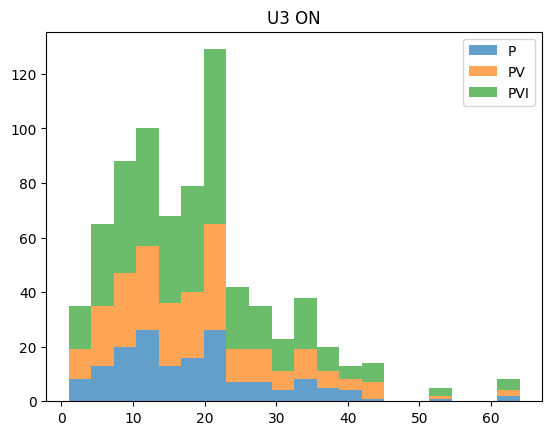

In [43]:
plt.hist([data_p['NUPDR3ON'], data_pv['NUPDR3ON'], data_pvi['NUPDR3ON']], 20, label=['P', 'PV', 'PVI'], alpha=0.7, stacked=True)
plt.legend()
plt.title('U3 ON')

Text(0.5, 1.0, 'U3 OFF')

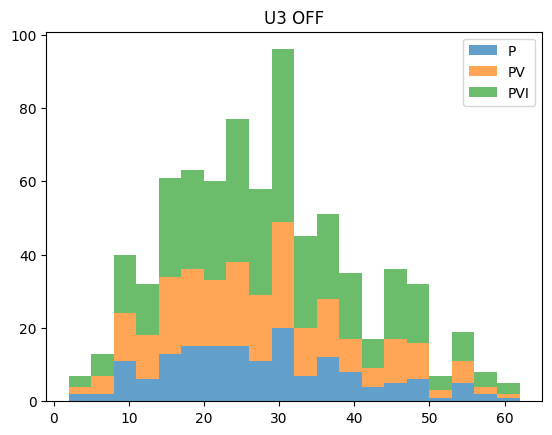

In [44]:
plt.hist([data_p['NUPDR3OF'], data_pv['NUPDR3OF'], data_pvi['NUPDR3OF']], 20, label=['P', 'PV', 'PVI'], alpha=0.7, stacked=True)
plt.legend()
plt.title('U3 OFF')

Text(0.5, 1.0, 'SCORE')

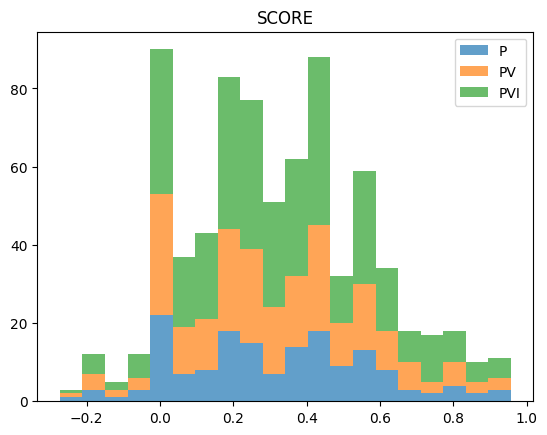

In [47]:
plt.hist([data_p['SCORE'], data_pv['SCORE'], data_pvi['SCORE']], 20, label=['P', 'PV', 'PVI'], alpha=0.7, stacked=True)
plt.legend()
plt.title('SCORE')

Text(0.5, 1.0, 'DURATION')

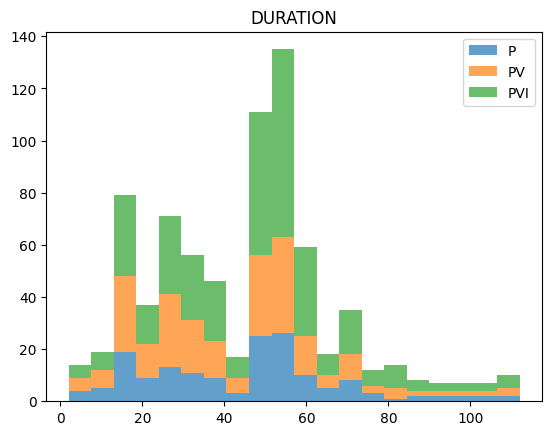

In [46]:
plt.hist([data_p['DURATION'], data_pv['DURATION'], data_pvi['DURATION']], 20, label=['P', 'PV', 'PVI'], alpha=0.7, stacked=True)
plt.legend()
plt.title('DURATION')

Text(0.5, 1.0, 'AGE_AT_VISIT')

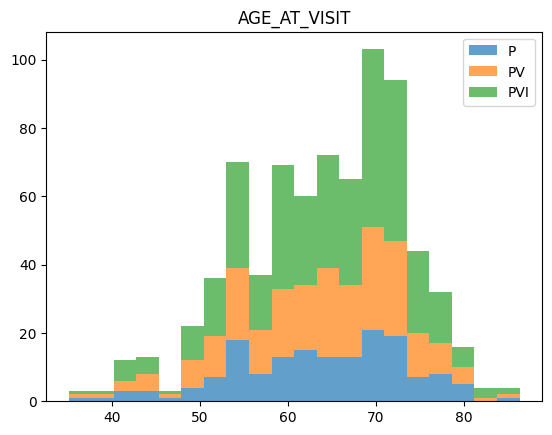

In [48]:
plt.hist([data_p['AGE_AT_VISIT'], data_pv['AGE_AT_VISIT'], data_pvi['AGE_AT_VISIT']], 20, label=['P', 'PV', 'PVI'], alpha=0.7, stacked=True)
plt.legend()
plt.title('AGE_AT_VISIT')